Multicollinearity in Linear Regression
* In regression, "multicollinearity" refers to predictors that are correlated with other predictors. Multicollinearity occurs when your model includes multiple factors that are correlated not just to your response variable, but also to each other. In other words, it results when you have factors that are a bit redundant

In [1]:
import statsmodels.api as sm
import pandas as pd
df=pd.read_csv("Data/advertising.csv")

In [2]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#Spliting Data into Dependent and Non dependent variables
X=df[["TV","radio","newspaper"]]
y=df["sales"]

In statistics, ordinary least squares (OLS) is a type of linear least squares method for estimating the unknown parameters in a linear regression model. OLS chooses the parameters of a linear function of a set of explanatory variables by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the given dataset and those predicted by the linear function.




We will ise OLS to give us the coefficients for the various independent variables. OLS will help us when we calculating the residuals. Also add a cosntant to the independent varible to represent the intercept

In [6]:
X=sm.add_constant(X)


In [8]:
X.head()

,const,TV,radio,newspaper
0,1.0,230.1,37.8,69.2
1,1.0,44.5,39.3,45.1
2,1.0,17.2,45.9,69.3
3,1.0,151.5,41.3,58.5
4,1.0,180.8,10.8,58.4


In [9]:
model=sm.OLS(y,X).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           1.58e-96
Time:                        15:09:53   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Alternatively, you can also use Seaborns heat map or matplotlibs Corr plot

In [14]:
x=X.iloc[:,1:]
x.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [15]:
x.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


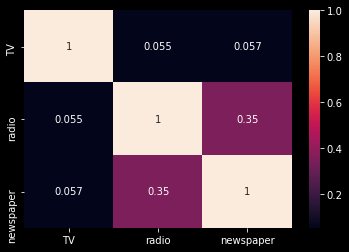

In [18]:
import seaborn as sns
sns.heatmap(x.corr(), annot=True)

In [19]:
# Wroking on another Data